In [1]:

import pyscisci.all as pyscisci

import numpy as np
import matplotlib.pylab as plt
try:
    import seaborn as sns
    sns.set_style('white')
except:
    pass

%matplotlib inline

In [2]:
# set this path to where the MAG database will be stored
path2mag = '/home/ajgates/MAG'


In [3]:
mymag = pyscisci.MAG(path2mag, keep_in_memory=False) 
# set keep_in_memory=False if you want to load the database each time its needed - good for when you 
# cant keep more than one database in memory at a time
# otherwise keep_in_memory=True will keep each database in memory after its loaded

In [ ]:
# before we can start running our analysis, we have to preprocess the raw data into
# DataFrames that are more convinent to work with

# we only need to run this for the first time, but it will take awhile
mymag.preprocess(verbose=True)

In [ ]:
# MAG contains the following dataframes:

# pub_df - keeps all of the publication information
# columns : ['PublicationId', 'Year', 'JournalId', 'FamilyId',  'Doi', 'Title', 'Date', 'Volume', 'Issue', 'DocType']

# author_df - keeps all of the author information
# columns : ['AuthorId', 'FullName', 'LastName', 'FirstName', 'MiddleName']

# pub2ref_df - links publications to their references or citations
# columns : ['CitingPublicationId', 'CitedPublicationId']

# paa_df - links publications, authors, and affiliations
# columns : ['PublicationId', 'AuthorId', 'AffiliationId', 'AuthorSequence',  'OrigAuthorName', 'OrigAffiliationName']

# author2pub_df - links the authors to their publications
# columns : ['PublicationId', 'AuthorId', 'AuthorOrder']

# field_df - field information
# columns : ['FieldId', 'FieldLevel', 'NumberPublications', 'FieldName']

# pub2field_df - links publications to their fields
# columns : ['PublicationId', 'FieldId']

# affiliation_df - affiliation information
# columns : ['AffiliationId', 'NumberPublications', 'NumberCitations', 'FullName', 'GridId', 'OfficialPage', 'WikiPage', 'Latitude', 'Longitude']

# journal_df - journal information
# columns : ['JournalId', 'FullName', 'Issn', 'Publisher', 'Webpage']


# after additional processing, these DataFrames become available

# pub2refnoself_df - links publications to their references or citations with self-citations removed
# columns : ['CitingPublicationId', 'CitedPublicationId']

# impact_df - precomputed citation counts, columns will depend on which counts are computed
# columns : ['PublicationId', 'Year', ....]

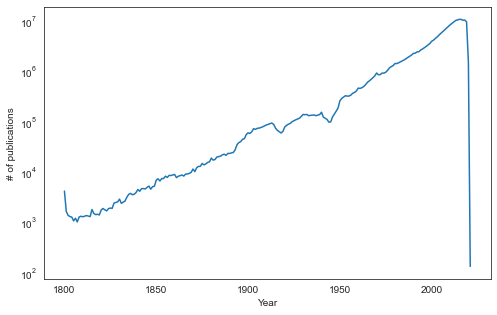

In [5]:
# lets plot the number of publications each year

# first load the publication dataframe
pub_df = mymag.pub_df

# then 
yearly_articles = pyscisci.groupby_count(df=pub_df, colgroupby='Year', colcountby='PublicationId', count_unique=True)
yearly_articles.sort_values(by='Year', inplace=True)
yearly_articles = yearly_articles.loc[yearly_articles['Year'] > 0]

fig, ax = plt.subplots(1,1,figsize=(8,5))

ax.plot(yearly_articles['Year'],yearly_articles['PublicationIdCount'])

ax.set_xlabel('Year')
ax.set_ylabel("# of publications")
ax.set_yscale('log')

plt.show()

Loading Publication Author Affiliation:   0%|          | 0/63 [00:00<?, ?it/s]

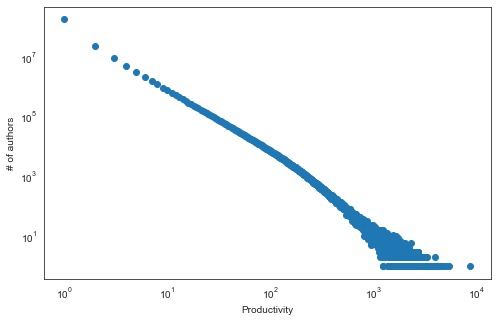

In [6]:
# now we can see the distribution of author productivity 

pa_df = mymag.author2pub_df # publication author relationships

author_prod = pyscisci.author_productivity(pa_df, colgroupby = 'AuthorId', colcountby = 'PublicationId')

prodvalues, prodcounts = np.unique(author_prod['Productivity'].values, return_counts=True)

fig, ax = plt.subplots(1,1,figsize=(8,5))

ax.scatter(prodvalues, prodcounts)

ax.set_xlabel('Productivity')
ax.set_ylabel("# of authors")
ax.set_xscale('log')
ax.set_yscale('log')

plt.show()